# Experiments

In this notebook we perform different ways to encode the concepts' features based on *Rank_PF*, *Disting*, and *Intercorr_str_tax*. 
This notebooks uses the SimLex-999 dataset... 

## Header

Libraries and additional programs

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy
import random
from scipy.stats.stats import pearsonr

%matplotlib inline

pathh = '../Data/' 
exp_file = '../Data/ExperimentalResults.xlsx'   

## Initializing memory and encoding dataset in HD space

In [2]:
%run EncodingDataset.ipynb

Init_mem('normal')
#Init_mem('Rank_PF', 6)  #6, 8, 10, 12...
#Init_mem('Disting', 6)   # -> creo que habrá que modificar función CreateSemanticPointer... para admitir lista tamaño 0
#Init_mem('Intercorr_str', 6)
#Init_mem('Intercorr-Rank', 6)

# List of all concepts in dataset
Concepts = get_concepts_list() 

# Para cada modo hay que crear un diccionario,... luego de Init_mem hacer una copia de la variable global Dict y 
# llamala segun el modo... después la comparación será más fácil... 

End of memory initialization
Begining to encode dataset...
End of encoding


## SimLex-999 dataset

_SimLex-999 is a gold standard resource for the evaluation of models that learn the meaning of words and concepts. 
SimLex-999 provides a way of measuring how well models capture similarity, rather than relatedness or association. The scores in SimLex-999 therefore differ from other well-known evaluation datasets such as WordSim-353. Example:_

**coast - shore**   9.000 (SimLex-999 rating)    9.1 (WordSim-353 rating)

**clothes - closet**  1.96 (SimLex-999 rating)   9.1 (WordSim-353 rating)

_More information: https://fh295.github.io/simlex.html_

Just as with the previous dataset, first we find out how many pairs are there for which both concepts appear in the McRae dataset. 

In [3]:
SimLex_path = "../Data/SimLex-999.txt"
SimLex_file = open(SimLex_path, "r")

SimLex = SimLex_file.readlines()
SimLex = [str.split(x) for x in SimLex][1:]   # Removed first line (column's names)

#We are interested in the first to elements of each line (row)
SimLexList = []
for row in SimLex:
    if row[0] in Concepts and row[1] in Concepts and row[2] == 'N':
        SimLexList.append([row[0], row[1], float(row[3])])

print(len(SimLexList))

# Sorting list...
SimLexList = sorted(SimLexList, key = lambda x: x[2])
print SimLexList

44
[['car', 'hose', 0.87], ['car', 'bridge', 0.95], ['car', 'elevator', 1.03], ['mouse', 'cat', 1.12], ['box', 'cigar', 1.25], ['box', 'elevator', 1.32], ['house', 'carpet', 1.38], ['chicken', 'rice', 1.43], ['ball', 'basket', 1.67], ['dog', 'cat', 1.75], ['house', 'key', 1.9], ['bread', 'cheese', 1.95], ['door', 'cellar', 1.97], ['spoon', 'cup', 2.02], ['boat', 'anchor', 2.25], ['boat', 'car', 2.37], ['cat', 'rabbit', 2.37], ['dog', 'horse', 2.38], ['ball', 'cannon', 2.58], ['cow', 'goat', 2.93], ['horse', 'ox', 3.02], ['bed', 'bedroom', 3.4], ['bed', 'couch', 3.42], ['bed', 'chair', 3.5], ['gun', 'knife', 3.65], ['guitar', 'drum', 3.78], ['apple', 'lemon', 4.05], ['house', 'barn', 4.33], ['wall', 'brick', 4.68], ['calf', 'bull', 4.93], ['cup', 'jar', 5.13], ['plate', 'bowl', 5.23], ['door', 'gate', 5.25], ['gun', 'cannon', 5.68], ['house', 'apartment', 5.8], ['cabin', 'hut', 6.53], ['chair', 'bench', 6.67], ['sofa', 'chair', 6.67], ['cat', 'lion', 6.75], ['sweater', 'jacket', 7.15], 

### a) Visualizing dataset

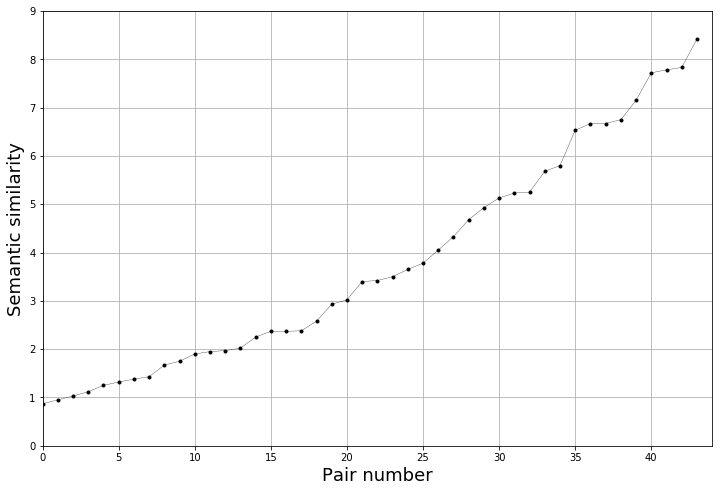

In [4]:
plt.rcParams["figure.figsize"] = [12,8]
plt.plot([x[2] for x in SimLexList], color='k', linestyle='-', marker='.', markersize=6, linewidth=.3 )  
plt.xlim((0,44))
plt.ylim((0,9))
plt.xlabel('Pair number', fontsize=18)
plt.ylabel('Semantic similarity', fontsize=18)
plt.grid(True)
plt.savefig('HumSim-SimLex.png', dpi=300)

### b) Measuring similarity

In [5]:
# Create list of distances for each method
HD_SimLex = []; McRae_SimLex = []; WUP_SimLex = []; LCH_SimLex = []; RES_SimLex = []; JCN_SimLex = []

# Loop over all pairs of concepts
i = 0
print "Starting..."
for pair in SimLexList:
    print i,
    HD_SimLex.append(1. - HDvector.dist(Dict[pair[0]].getPointer(), Dict[pair[1]].getPointer()) / float(N))
    McRae_SimLex.append( McRae_simi(pair[0:2]) )
    WUP_SimLex.append(similarity_fun(wn.wup_similarity, pair[0:2]))
    LCH_SimLex.append(similarity_fun(wn.lch_similarity, pair[0:2]))
    RES_SimLex.append(similarity_fun(wn.res_similarity, pair[0:2], brown_ic))
    JCN_SimLex.append(similarity_fun(wn.jcn_similarity, pair[0:2], brown_ic))
    i += 1
print "End"

Starting...
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 End


### c) Computing correlation

In [6]:
SimLex_vals = [float(x[2]) for x in SimLexList]

correlations = [['HDC', pearsonr(SimLex_vals, HD_SimLex)[0]], ['McRae', pearsonr(SimLex_vals, McRae_SimLex)[0]],
                ['wup', pearsonr(SimLex_vals, WUP_SimLex)[0]], ['lch', pearsonr(SimLex_vals, LCH_SimLex)[0]],
                ['res', pearsonr(SimLex_vals, RES_SimLex)[0]], ['jcn', pearsonr(SimLex_vals, JCN_SimLex)[0]]]

correlations = sorted(correlations, key = lambda x : x[1], reverse = True)

print correlations

[['HDC', 0.6489717363457331], ['McRae', 0.6249538446769186], ['res', 0.5148772163908228], ['lch', 0.43627661476892626], ['wup', 0.42406723211596103], ['jcn', 0.35782780233339617]]


### d) Plotting

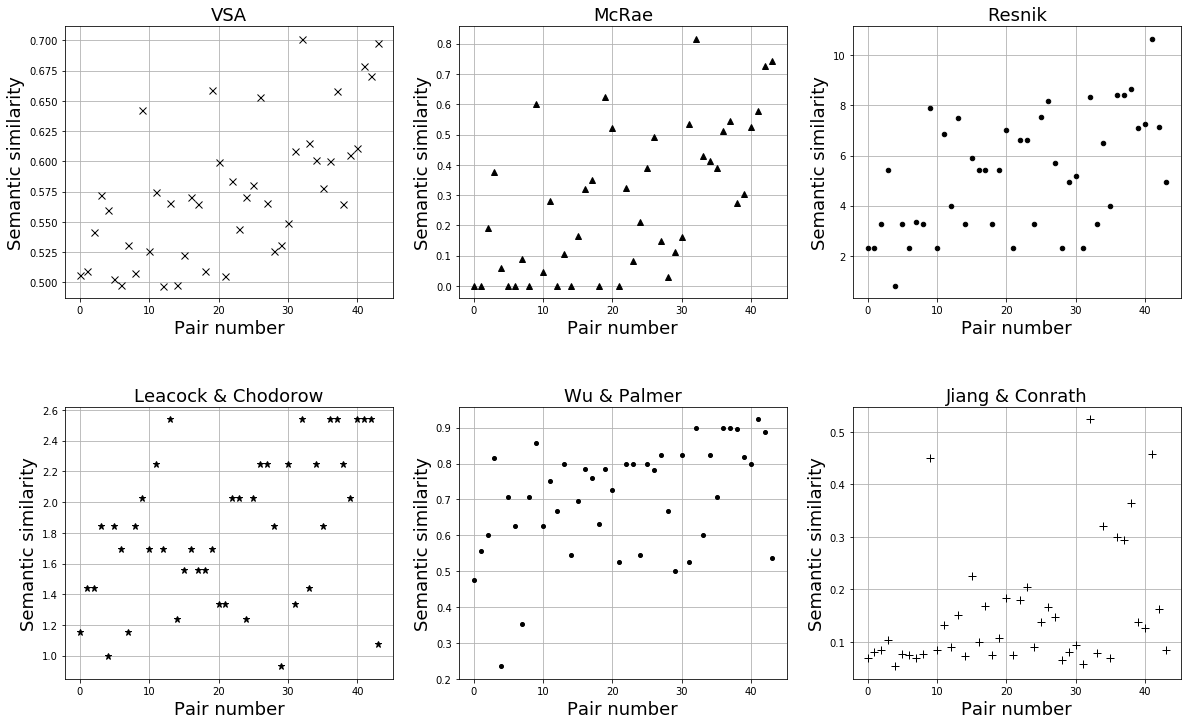

In [7]:
plt.rcParams["figure.figsize"] = [20,12]
f_size = 18
plt.subplots_adjust(hspace=0.4)

plt.subplot(231)
plt.plot(HD_SimLex, color='k', linestyle='None', marker='x', markersize=7, linewidth=1 )  
plt.title('VSA', fontsize=f_size)
plt.xlabel('Pair number', fontsize=f_size)
plt.ylabel('Semantic similarity', fontsize=f_size)
plt.grid(True)

plt.subplot(232)
plt.plot(McRae_SimLex, color='k', linestyle='None', marker='^', markersize=6, linewidth=1 )  
plt.title('McRae', fontsize=f_size)
plt.xlabel('Pair number', fontsize=f_size)
plt.ylabel('Semantic similarity', fontsize=f_size)
plt.grid(True)


plt.subplot(233)
plt.plot(RES_SimLex, color='k', linestyle='None', marker='.', markersize=9, linewidth=1 )  
plt.title('Resnik', fontsize=f_size)
plt.xlabel('Pair number', fontsize=f_size)
plt.ylabel('Semantic similarity', fontsize=f_size)
plt.grid(True)

plt.subplot(234)
plt.plot(LCH_SimLex, color='k', linestyle='None', marker='*', markersize=7, linewidth=1 )  
plt.title('Leacock & Chodorow', fontsize=f_size)
plt.xlabel('Pair number', fontsize=f_size)
plt.ylabel('Semantic similarity', fontsize=f_size)
plt.grid(True)

plt.subplot(235)
plt.plot(WUP_SimLex, color='k', linestyle='None', marker='.', markersize=8, linewidth=1 )  
plt.title('Wu & Palmer', fontsize=f_size)
plt.xlabel('Pair number', fontsize=f_size)
plt.ylabel('Semantic similarity', fontsize=f_size)
plt.grid(True)

plt.subplot(236)
plt.plot(JCN_SimLex, color='k', linestyle='None', marker='+', markersize=8, linewidth=1 )  
plt.title('Jiang & Conrath', fontsize=f_size)
plt.xlabel('Pair number', fontsize=f_size)
plt.ylabel('Semantic similarity', fontsize=f_size)
plt.grid(True)

plt.savefig('SubPlots-SimLex.png') #, dpi=1000)